<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Appendix: BSM Option Class

In [1]:
from bsm_option_class import *

In [2]:
o = bsm_call_option(100., 105., 1.0, 0.05, 0.2)
type(o)

bsm_option_class.bsm_call_option

In [3]:
value = o.value()
value

8.021352235143176

In [4]:
o.vega()

39.67052380842653

In [5]:
o.imp_vol(C0=value)

0.2

In [6]:
import numpy as np
maturities = np.linspace(0.05, 2.0, 20)
strikes = np.linspace(80, 120, 20)
T, K = np.meshgrid(strikes, maturities)
C = np.zeros_like(K)
V = np.zeros_like(C)
for t in enumerate(maturities):
    for k in enumerate(strikes):
        o.T = t[1]
        o.K = k[1]
        C[t[0], k[0]] = o.value()
        V[t[0], k[0]] = o.vega()

In [7]:
from pylab import cm, mpl, plt
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

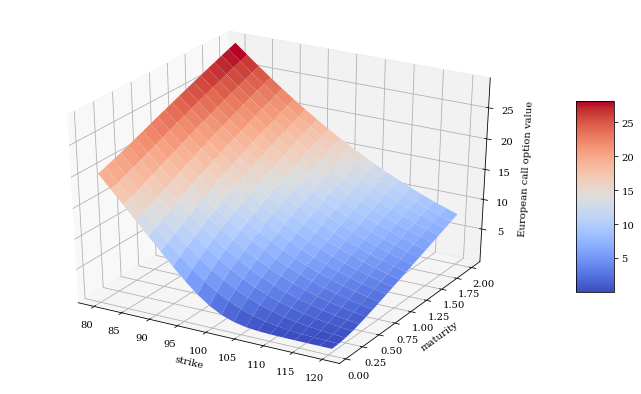

In [8]:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, K, C, rstride=1, cstride=1,
            cmap=cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('maturity')
ax.set_zlabel('European call option value')
fig.colorbar(surf, shrink=0.5, aspect=5);
# plt.savefig('../../images/b_bsm/bsm_01.png');

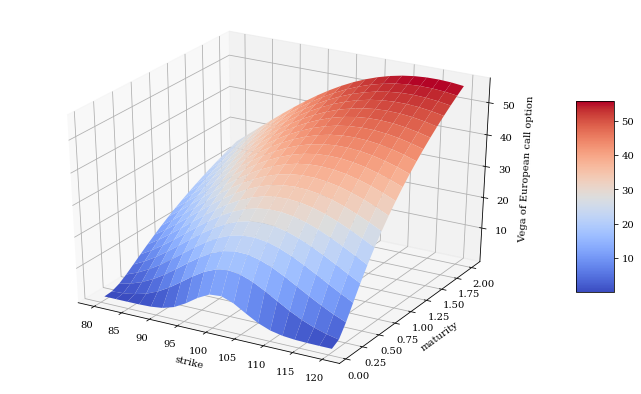

In [9]:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, K, V, rstride=1, cstride=1,
            cmap=cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('maturity')
ax.set_zlabel('Vega of European call option')
fig.colorbar(surf, shrink=0.5, aspect=5);
# plt.savefig('../../images/b_bsm/bsm_02.png');

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>